

# Project: No-show appointment 

<a id='intro'></a>
## Introduction
Aim: To do the analysis and figure out the factors why do people miss their appointments

In [1]:
#import useful python packages for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#magical word to see the visualization/graphs in the jupyter notebook
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report,the data is being loaded and checked for if it is clean and all the necessary actions have been taken to make sure the data is clean and tidy. 

### General Properties

In [2]:
# load the data and see how does it look by checking first five rows using the .head() method
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Perform operations to inspect data types and look for instances of missing or possibly errant data
# .info() method gives the data types & non-null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Information about the Dataset
1. Total no. of Rows = 110527
2. Total no. of Columns = 14
3. There are no any missing rows/null values in any column as every column has 110528 non-null values which is equal to the total number of rows of the data

In [87]:
# to check for the duplicated rows
sum(df.duplicated())

0

There are no any duplicate rows

### Data Cleaning process
Firstly, we will check the data types of each column one by one and correct them


In [4]:
#PatientId --> Float type
#PatientId is unique and can't be a float number
#convert PatientId data type from float to int using .astype method
df['PatientId']=df['PatientId'].astype(int)
#check PatientId datatype
df['PatientId'].dtype


dtype('int64')

In [5]:
#check first 3 rows of the data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [6]:
#checking Age column
#check if there are no any impossible age present
print('Age:',sorted(df.Age.unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


* As we can see that some age values are negative and zero, which is not possible.
* Also, there are very less chance that people above 95 age exist, so for this analysis, I am just considering people having age greater than zero and less than 96 years

In [7]:
#Fixing Age column
#removing rows where Age is not in this range (0-95)

df=df[(df.Age>0) & (df.Age<96)]

#check age column data

df['Age'].unique()


array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  3,  1, 69, 68, 60, 67, 36, 10,
       35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77, 81,
       70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80, 87,
       88, 84, 82, 90, 94, 86, 91, 92, 93, 95])

In [8]:
#Fixing handcap column, renaming it from handcap to Handicapped

df=df.rename(columns={'Handcap': 'Handicapped','Hipertension':'Hypertension'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106941 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106941 non-null int64
AppointmentID     106941 non-null int64
Gender            106941 non-null object
ScheduledDay      106941 non-null object
AppointmentDay    106941 non-null object
Age               106941 non-null int64
Neighbourhood     106941 non-null object
Scholarship       106941 non-null int64
Hypertension      106941 non-null int64
Diabetes          106941 non-null int64
Alcoholism        106941 non-null int64
Handicapped       106941 non-null int64
SMS_received      106941 non-null int64
No-show           106941 non-null object
dtypes: int64(9), object(5)
memory usage: 12.2+ MB


In [9]:
#check Gender column
list(df['Gender'].unique())

['F', 'M']

In [10]:
#Gender column counts
df['Gender'].value_counts()

F    70081
M    36860
Name: Gender, dtype: int64

There are no any invalid data present in gender column

In [11]:
#check No-Show Column
list(df['No-show'].unique())

['No', 'Yes']

In [12]:
df['No-show'].value_counts()

No     85268
Yes    21673
Name: No-show, dtype: int64

In [13]:
#checking handicapped column values
list(df['Handicapped'].unique())

[0, 1, 2, 3, 4]

In [14]:
df['Handicapped'].value_counts()

0    104710
1      2033
2       182
3        13
4         3
Name: Handicapped, dtype: int64

* Tere are 5 different levels of Handicapped column.
* Here, 0 & 1 level have significant number(104710+2033=106743) compared to the other values i.e (182+13+3=198)
* Also, for the analysis, I am assuming only two types of people exist, either they are handicapped or they are not handicapped.
* I am assigning 0 for non-handicapped & 1 for Handicapped
* let's drop other levels of handicapped values

In [15]:
#keeping handicapped values only 0 & 1 
df = df[(df.Handicapped == 0) | (df.Handicapped == 1)]
list(df['Handicapped'].unique())


[0, 1]

In [16]:
#check scheduledDay column
df['ScheduledDay'].head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

In [17]:
#check AppointmentDay column
df['AppointmentDay'].head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

* Here, we can see that the data types of both ScheduledDay & AppointmentDay is String, convert this to datetime datatype
* For our analysis, only day part of the ScheduledDay & appointmentDay would work fine,I ignore the hour and smaller time units and keep days only
* As we need to see the difference of ScheduledDay & AppointmentDay, so we need to append a column whose values would be a difference of ScheduledDay & AppointmentDay


In [18]:
# append a new column "waitdays"
df['waitdays'] = pd.to_datetime(df['AppointmentDay'])- pd.to_datetime(df['ScheduledDay'])

#Using of lambda function to take out days part from waitdays values


df['waitdays']= df['waitdays'].apply(lambda x: x.days)
list(df['waitdays'].unique())

[-1,
 1,
 2,
 0,
 3,
 8,
 28,
 9,
 22,
 10,
 17,
 16,
 13,
 27,
 23,
 20,
 14,
 15,
 21,
 42,
 29,
 30,
 41,
 31,
 55,
 44,
 45,
 38,
 36,
 37,
 43,
 49,
 59,
 51,
 52,
 64,
 66,
 90,
 65,
 83,
 77,
 86,
 114,
 108,
 62,
 69,
 71,
 56,
 57,
 50,
 58,
 40,
 72,
 63,
 19,
 48,
 32,
 33,
 5,
 34,
 35,
 11,
 12,
 39,
 46,
 7,
 4,
 6,
 24,
 25,
 47,
 26,
 18,
 60,
 54,
 61,
 175,
 76,
 68,
 75,
 88,
 80,
 78,
 53,
 67,
 74,
 84,
 111,
 -2,
 79,
 85,
 97,
 93,
 82,
 141,
 154,
 161,
 168,
 103,
 132,
 124,
 95,
 87,
 89,
 150,
 125,
 126,
 110,
 118,
 73,
 70,
 81,
 102,
 107,
 109,
 101,
 121,
 100,
 104,
 91,
 96,
 92,
 106,
 94,
 -7,
 138,
 131,
 178,
 116,
 145,
 122]

value of waitdays: -1 means 'today', 0 means 'tomorrow', which means the valid day > -1

In [19]:
# drop waitdays values less than -1
df.drop(df[df.waitdays < -1].index, inplace=True)

* We need to do the analysis between No-show & other parametrs like Age,Gender, Hospital Location, waitdays etc, so   we can drop columns like PatientId, AppointmentId
* Also, now we have waitdays column, so we don't require ScheduledDay & AppointmentDay anymore. We can drop them too

In [20]:
#drop PatientId, AppointmentID, ScheduledDay, Appointment day columns
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1,inplace=True)


In [21]:
#Update values in No-show column, No for 0, Yes for 1, and rename it
df['No-show'] = df['No-show'].map({'Yes':1,'No':0})


In [22]:
#check data now
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show,waitdays
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


* All columns look clean now, here Data wrangling process is done
* save this data set with a new name "clean_data.csv"

In [23]:
df.to_csv('clean_data.csv',index=False)

In [24]:
#read new dataset
df_clean=pd.read_csv('clean_data.csv')
df_clean.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show,waitdays
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


<a id='eda'></a>
## Exploratory Data Analysis

Now, the Data Wrangling process is done and we have a clean data. we can now do some statistics and create some visualization to see the relationships between different variables

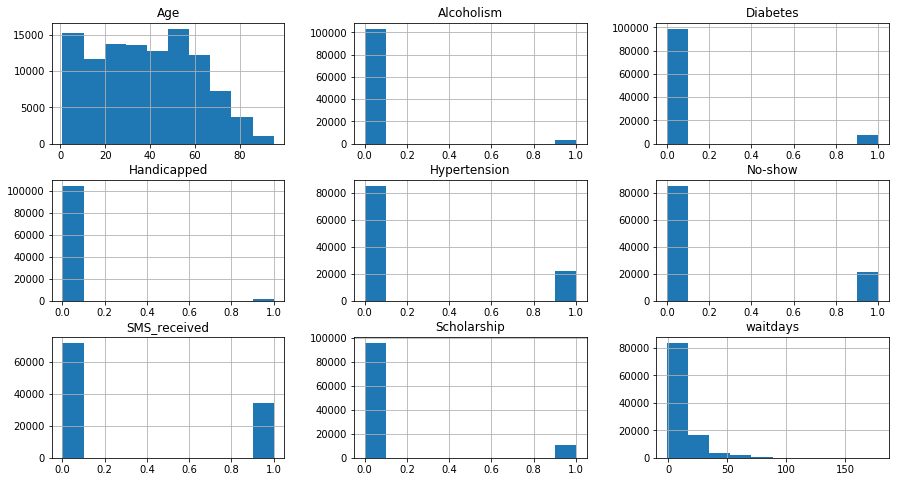

In [25]:
#Firstly plot histograms for different variables
df_clean.hist(figsize=(15, 8));

In [26]:
# check data describe
df_clean.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show,waitdays
count,106738.000000,106738.000000,106738.000000,106738.000000,106738.000000,106738.000000,106738.000000,106738.000000,106738.000000
mean,38.273811,0.101098,0.203198,0.073957,0.031404,0.019028,0.323540,0.202618,9.170352
std,22.422524,0.301460,0.402381,0.261702,0.174408,0.136624,0.467829,0.401952,15.264015
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


based on the histogram charts, we can roughly estimate a few things
1. Age - most of the people are below 60 years
2. Scholarship - most of the people are not a part of the Scholarship program 
3. Hypertension - most of the people don't suffer from Hypertension
4. Diabetes - Most of the people don't suffer from Diabetes
5. Alcoholism - Most of the people don't suffer from alcoholism
6. Handicapped - most of the people aren't handicapped
7. SMS_received- Most of the people didn't receive SMS


* Here, we can see that Age column is havind better distribution between the number of patients. So, Age is the most relevant variable here among other variables.
* Also, we can check waitdays & SMS received as the rest relevant variables available


Research Question 1 :  Relationship between "Gender" & "No-Show"

1. Who visits the doctor more often??

In [27]:
gender_noshow = df_clean.groupby('Gender').sum()
gender_noshow


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No-show,waitdays
Gender,,,,,,,,,
F,2785227,8813,15267,5574,1223,1173,23729,14240,665350
M,1300043,1978,6422,2320,2129,858,10805,7387,313475


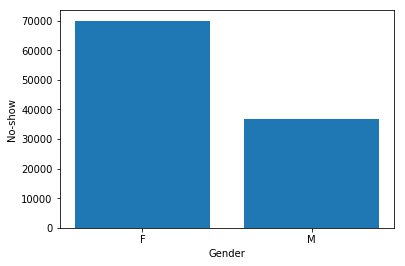

In [113]:
#Relationship: Gender - No Show

fig, ax = plt.subplots()  
x = df_clean.Gender.unique()  
# Counting 'Males' and 'Females' in the dataset  
y = df_clean.Gender.value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Gender')  
ax.set_ylabel('No-show')  
plt.show()  

Observation:
* By looking at the number of F & M, we can say that there are more number of Females patients 
* Also, by looking at the number we can say that Females tend to take care of their health more than men due to difference in the number of appointment for no show.
* the rate of no-showing rate of men is smaller than women, so the proportion for no-showing for men & female are the same

Research Question 2 :  Relationship between "Age" & "No-Show"

1. Which age group are more likely to visit the doctor??

In [28]:
#Relationship Age - No show

median = df_clean['Age'].median()


low_age = df_clean.query('Age < {}'.format(median))

high_age = df_clean.query('Age >= {}'.format(median))


noshow_sum_low = low_age['No-show'].sum()

noshow_sum_high = high_age['No-show'].sum()


Text(0,0.5,'Total Count On NoShow')

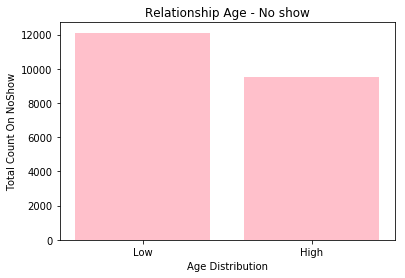

In [29]:
locations = [1, 2]
heights = [noshow_sum_low, noshow_sum_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels,color='pink')
plt.title('Relationship Age - No show')
plt.xlabel('Age Distribution')
plt.ylabel('Total Count On NoShow')

In [117]:
#top 5 age group for no-show
age_noshow = df_clean.groupby('Age').sum()["No-show"]
age_noshow = age_noshow/ df_clean['Age'].value_counts()
age_noshow.sort_values(ascending=False).head(3)

14    0.282901
13    0.274955
15    0.266002
dtype: float64

* By looking at the bar graph, we can conclude that no-showing rate decreases as the person becomes older, may be     because:
1. Older age people fall sick and get more serious diseses which are not likely to miss the appointment as              compared to young people
2. people might face difficulties bringing their children to the appointment
3. Top 3 age group for more likely to miss the appointment is 13, 14 & 15 age


Research Question 3 :  Relationship between "Neighbourhood" & "No-Show"

1. Which are top 10 neighborhoods where patients are less likely to show up

In [118]:
#Relationship-Neighbourhood-No-show

#Number of no-show patients in each hospital
Neighbourhood_noshow = df_clean.groupby('Neighbourhood').sum()['No-show']

#top 10 neighbourhood for no show up
top10_noshow = Neighbourhood_noshow.sort_values(ascending=False).head(10)
top10_noshow


Neighbourhood
JARDIM CAMBURI       1432
MARIA ORTIZ          1194
ITARARÉ               896
RESISTÊNCIA           871
CENTRO                690
JESUS DE NAZARETH     676
JARDIM DA PENHA       627
CARATOÍRA             585
TABUAZEIRO            551
BONFIM                534
Name: No-show, dtype: int64

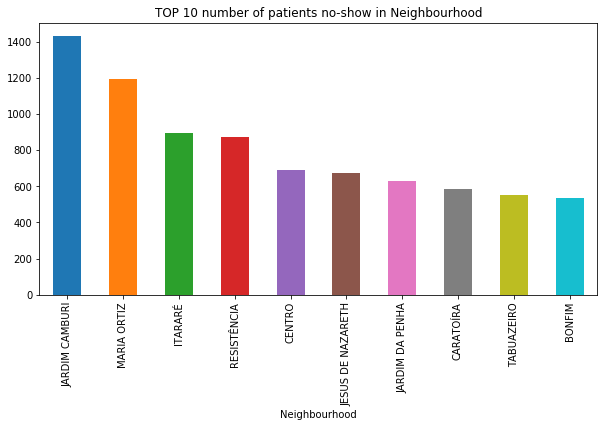

In [119]:
top10_noshow.plot(kind='bar',figsize=(10,5),title = 'TOP 10 number of patients no-show in Neighbourhood')

* these are the top 10 neighborhood where patients are less likely to show up
  
1. JARDIM CAMBURI       
2. MARIA ORTIZ          
3. ITARARÉ               
4. RESISTÊNCIA           
5. CENTRO                
6. JESUS DE NAZARETH     
7. JARDIM DA PENHA       
8. CARATOÍRA            
9. TABUAZEIRO            
10. BONFIM                
  

Research Question 4 :  Relationship between "waitdays" & "No-Show"

1. how is no-show related to waitdays??

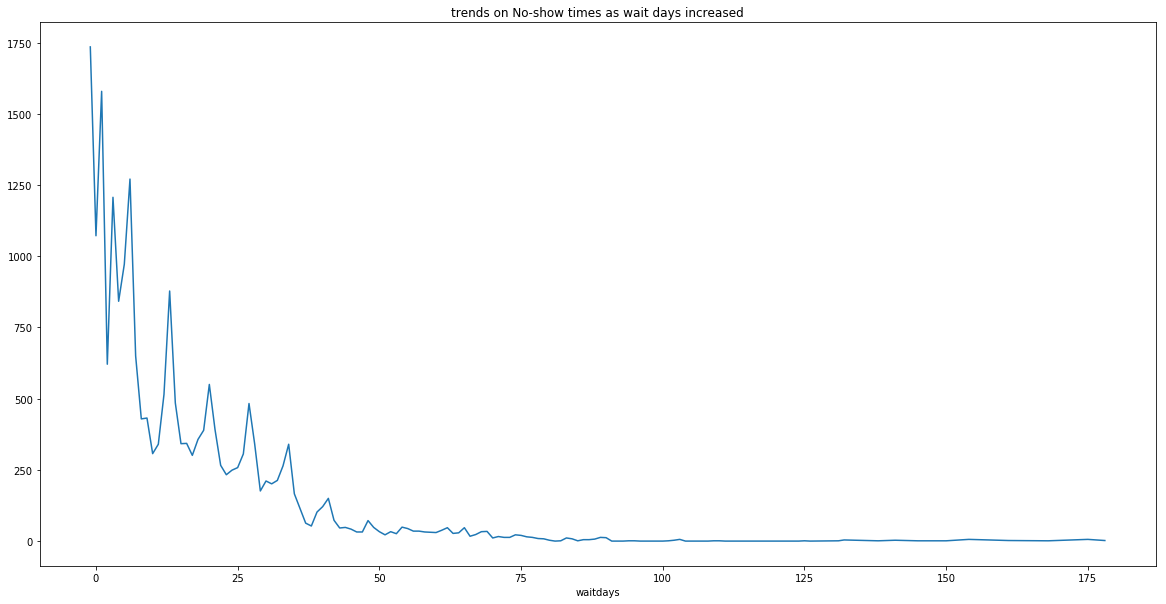

In [120]:
#relationship on waitdays with No-show
wait_noshow = df_clean.groupby('waitdays').sum()['No-show']
wait_noshow.plot(figsize=(20,10),title='trends on No-show times as wait days increased')

we can conclude from the graph that as waitdays increases there is  a drop in the no-show, may be because of being an older public who require regular medical follow-up and tend to schedule more appointments

Reserch 5:
Relationship between 'Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received' and 'No_show'

In [136]:
#df_new = df_clean.groupby('No-show')['Scholarship', 'Hypertension',\
                       #'Diabetes', 'Alcoholism', 'Handicapped', 'SMS_received'].sum()
#df_new.query('No-show==1')


In [148]:
sms_noshow = df_clean.groupby('SMS_received').sum()['No-show']
sms_noshow


SMS_received
0    12068
1     9559
Name: No-show, dtype: int64

1. There are a total of 12068 patients who didn't come for the scheduled appointment because they didn't received SMS
2. and 9559 patients who received SMS they didn't come for the appointment

So, SMS received doesn't have much impact on a person showing up for the appointment

In [149]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0




Conclusion:




After exploring the dataset, I found the following observation and trends related to other factors for patients not showing up for their scheduled appointment.

1. We started our analysis with Research Question 1 : Relationship between "Gender" & "No-Show" : Who visits the     doctor more often??
and we found that Females are more likely to visit the hospital than men after doing analysis between females & males

2. What is the proportion of group not showing up for the appointment??
The female and younger take up mainly the ‘no-show’ group,but woman and men have a similar no-showing proportion

3. We didn't found any relevant aspect that can bring a consistent insight by analysing SMS received factor, Only that patients that have received sms have they're no-show rate increased in ~10% related to patients that haven't received any reminder

4. The no-showing rate of age decresases as older the person is. It reaches higher rates when the patient is a baby and the lowest rates when the patient is above 90 years old.




Limitation:




Study and conclusions are limited by the analysis of data:


1. As we saw in the "Age" column, there were negative age present which we had to drop before starting our analysis, may be because they have taken incorrectly because negative age is practically not possible.
2. Also, in the handicapped column, there were 5 different levels of handicapped values present. I assumed just 0    & 1 level and ignored other level, this might affect our analysis.
3. In AppointmentDay column there were only date present and time data was missing unlike ScheduledDay, we might have    done some better analysis by comparing both date and time data. 




References:


1.Analytics Vidhya - 12 Useful Pandas Techniques in Python for Data Manipulation. https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

2. Python for Data Science & Machine Learning by Jose Portilla.
https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733480?start=450

3. Medical Appointment No Show Kaggle discussion.
https://www.kaggle.com/joniarroba/noshowappointments/discussion


